# 1. Decision Trees and Naive bayes

## Decision Trees
Decision trees are a non-parametric supervised machine learning method used for classification and regression. they learn to predict the target value by learning rules. these rules are based on the given features. For example if you want to determine if someone has a sever risk of getting diabetes you could do the following: if blood glucose level is high then YES, else NO.

#### Advantages:
* Simple to understand and to interpret. The tree can be visualized.
* Doesn't require much data preparation, regarding normalization, dummy variables etc.
* The cost of using the tree is logarithmic in the number of datapoints, thus it is rather quick.
* Possible to validate a model using tests.

#### Disadvantages:
* Can create over-complex trees that do not generalize data well. Thus, overfitting is a big issue with trees, especially with high-dimensional data.
* Can be unstable, because small variations in data might result in completely different trees. That is why an ensemble is popular.
* Decision trees create biased trees if some classes dominate. Therefore, class-balancing is very important. This can be done using over- under-sampling and other techniques.

#### Tips on practical use
* As decision trees tend to overfit with a large number of features, make sure to getting the right ratio of samples to features.
* Consider performing dimensionality reduction.
* Consider creating another model that doesn't overfit for feature selection purposes.
* Tune max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, min_impurity_decrease.

# Naive bayes
Naive bayes are methods based on Bayes' theorem with the assumption of conditional independence between every pair of features given the value of a class variable.

Advantages:
- Tends to work really well in real-world situations.
- Can be very fast.
- Requires a small amount of training data.
- If the dataset does not fit into memory, some types can use the `partial_fit` method.

Disadvantages:
- Although it is a decent classifier, it is known as a bad estimator. Therefore the probabilities from `predict_proba` are not used normally.

Types of classifiers offered by scikit-learn:
- `GaussianNB` uses the Gaussian Naive Bayes algorithm for classification. It assumes that the likelihood of the features is Gaussian.
- `MultinomialNB` is used for multinomially distributed data.
- `ComplementNB` implements the complement naive Bayes algorithm. It is an adaptation of the mulltinomial naive bayes and is suitable for imbalanced data sets.
- `BernoulliNB` assumes that data is distributed according to multivariate Bernoulli distributions. Thus, it requires binary-valued variables.
- `CategoricalNB` implements naive Bayes for categorically distributed data. It assumes that each feature has its own categorical distribution.


## Decision tree example

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import  MinMaxScaler, StandardScaler 

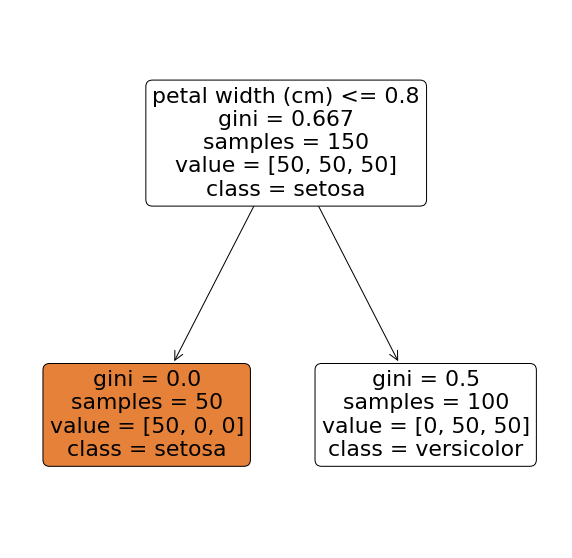

In [4]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier(max_depth=1)
dt.fit(X, y)
plt.figure(figsize=(10, 10))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

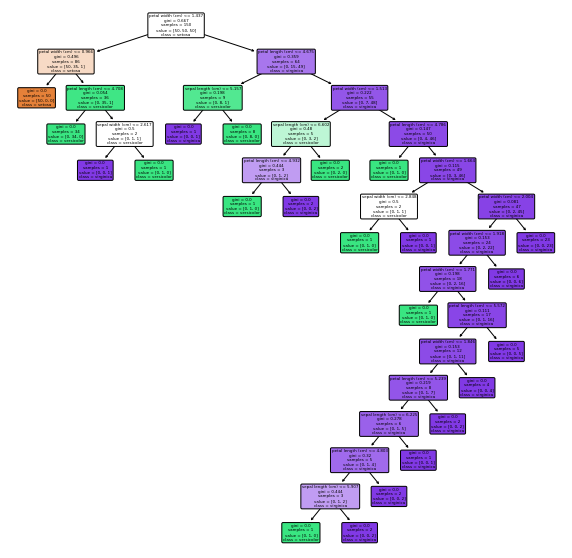

In [5]:
iris = load_iris()
X, y = iris.data, iris.target

# this is for demonstration, always split for generalizability.
dt = tree.DecisionTreeClassifier(max_depth=69, splitter='random')
dt.fit(X, y)
plt.figure(figsize=(10, 10))
tree.plot_tree(
    dt, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    filled=True,
    rounded=True,
)
plt.show()

# 2. Decision Tree Evaluation

## 1 Try to understand the dataset globally

Looking at the data i see that there are samples of malignant and benign. Each sample of malignant and benign cancers have 30 features describing them.

## 2 Load the data


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml

In [7]:
def get_config():
    with open("../config.yaml", 'r') as stream:
        config = yaml.safe_load(stream)
    return config

In [8]:
config = get_config()
df = pd.read_csv(config['breastcancer'])
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 3 Exploratory analysis


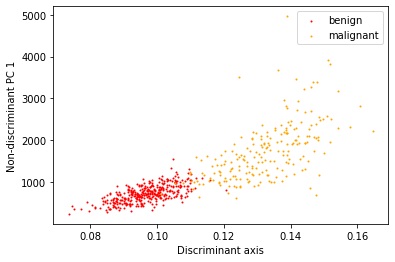

In [9]:
# devide the data
malignant = np.array(df[df['diagnosis'] == 'M'].values[:, 2:], dtype=float)
benign = np.array(df[df['diagnosis'] == 'B'].values[:, 2:], dtype=float)

#calculate the mean and the covariance
meanM = malignant.mean(axis=0)
meanB = benign.mean(axis=0)
nM = malignant.shape[0]
nB = benign.shape[0]
covM = np.cov(malignant.T)
covB = np.cov(benign.T)

#calculate the pooled covariance matrix
pooled = ((nB -1) * covB +(nM - 1) * covM) / (nB + nM -2)

#project the data onto the disciminant axis
a = np.linalg.inv(pooled) @ (meanM - meanB) 
a /= np.sqrt((a ** 2).sum())

tM = malignant @ a
tB = benign @ a

# deflate both groups, combine and plot data
Em = malignant - tM[:, None] * a[None, :]
Eb = benign - tB[:, None] * a[None, :]

X = np.concatenate((Em, Eb), axis=0)
S = np.cov(X.T)
vals, vecs = np.linalg.eig(S)
order = vals.argsort()[::-1]
vecs = vecs[:, order]
vals = vals[order]
Tm = malignant @ vecs
Tb = benign @ vecs

plt.scatter(tB, Tb[:, 0], s=1, c="red", label='benign')
plt.scatter(tM, Tm[:, 0], s=1, c="orange", label='malignant')
plt.xlabel("Discriminant axis")
plt.ylabel("Non-discriminant PC 1")
plt.legend()
plt.show()


## 4 Preprocess data

In [10]:
X = np.array(df.values[:, 2], dtype=float)
X = np.reshape(X, (X.shape[0], 1))
scaler=MinMaxScaler()
X= scaler.fit_transform(X)

y = df.values[:, 1]
encoded_y = preprocessing.LabelEncoder()
y = np.array(encoded_y.fit(y).transform(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9001)

## 5 Modeling (cross-validation and training)

In [11]:
dt = tree.DecisionTreeClassifier(random_state=42)
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],   
}
grid_dt = GridSearchCV(dt, params, verbose=1)
best_dt = grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\Mike Wierenga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike Wierenga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike Wierenga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\Mike Wierenga\AppData\Local\Programs\Python\Python39\lib\site-packages

In [12]:
best_dt.best_params_

{'criterion': 'gini', 'splitter': 'random'}

## 6 Evaluation 
a confussion matrix helps to see how well the models predict a certain class. In the confusion matrices below the 0 and 1 on both axis means benign and malignant. It predicts well when a sample is benign in 64 out of 72 cases. for the malignant the prediction went not so well it predicted 32 correct and 10 not correct. this could be because the dataset is not even between malignant and benign.

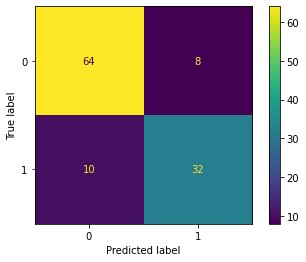

In [13]:
ConfusionMatrixDisplay.from_estimator(best_dt.best_estimator_, X_test, y_test)

# 3. Naive Bayes

Q: Why is it not useful to include the Roomate column in a classification procedure? 
A: Because it can bring confusion to the person working with the dataframe.

In [15]:
df = pd.DataFrame({'Roommate': [1,2,3,4,5,6,7], 'shivers': ['Y', 'N', 'Y', 'N', 'N', 'Y', 'Y'], 'running nose': ['N', 'N', 'Y', 'Y', 'N', 'N', 'Y'], 'headache': ['No', 'Mild', 'No', 'No', 'Heavy', 'No', 'Mild'], 'test result': ['Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive']})

In [16]:
columns = ['Roommate', 'shivers', 'running nose', 'headache', 'test' , 'result']
dummydf = pd.get_dummies(df)

In [17]:
clf = CategoricalNB(force_alpha=True)
X = dummydf[['shivers_Y', 'running nose_Y', 'headache_Heavy']]
y = dummydf[['test result_Positive']]
categoricalNB = clf.fit(X, y)

TypeError: __init__() got an unexpected keyword argument 'force_alpha'

In [ ]:
subject5 = np.array(X.iloc[4])
subject5 = np.reshape(subject5, (3,1))

In [ ]:
print(f'predicted: {clf.predict(subject5.T)}')
print(f'True value: {y.iloc[4].values}')

predicted: [False]
True value: [ True]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


## manual calculation

In [ ]:
X = dummydf[['shivers_Y', 'running nose_Y', 'headache_Heavy', 'test result_Positive']].values
X

array([[ True, False, False, False],
       [False, False, False, False],
       [ True,  True, False,  True],
       [False,  True, False, False],
       [False, False,  True,  True],
       [ True, False, False, False],
       [ True,  True, False,  True]])

In [ ]:
l_yes = 3/7 * 2/3 * 2/3 * 1/3
l_no = 4/7 * 2/4 * 1/4 * 4/4

P_yes = l_yes/(l_yes + l_no)
P_no = l_no/(l_yes + l_no)
print(P_yes)
print(P_no)

0.47058823529411764
0.5294117647058824
